In [5]:
#Import all dependencies from the scVAR enviroment (see installation instructions)
from scVAR import *
import sys
import pickle
import os
import scanpy as sc
import pandas as pd

# Print current working directory
print("Current working directory:", os.getcwd())

Current working directory: /DATA/31/scvar/scvar/notebook

In [6]:
#Check if all the arguments are in place 
if len(sys.argv) < 2:
    print("Errore: specify sample name as argument.")
    sys.exit(1)

sample = 'PT01' #sys.argv[1]
out_path = '../../' + 'aml' + '/' + sample + '/'
in_path = '../../' + 'aml' + '/' + sample + '/'

# Crea
if not os.path.exists(out_path):
    os.makedirs(out_path, exist_ok=True)

print('Start Analysis', sample)

# Specify transcriptomics file path 
tra_mat = in_path + 'matrix.mtx'
barcode_tra = in_path + 'clean_barcodes.txt'
feature = in_path + 'features.tsv'
# Specify genomic file path
var_mat = in_path + 'consensus.mtx'
barcode_var = in_path + 'barcodes_var.tsv'
snv = in_path + 'variants.tsv'

Start Analysis PT01

In [7]:
# Analize trascritomics and genomics separately
adata = transcriptomicAnalysis(path_10x=in_path, bcode_variants=barcode_var,n_pcs=50)
adata = variantAnalysis(adata, matrix_path=var_mat, bcode_path=barcode_var, variants_path=snv)

#Perform data integration
adata = omicsIntegration(adata)
 
# Compute transcriptomics, genomics and integrated clusters at different resolutions
for res in [0.01, 0.05, 0.5]:
    adata = calcOmicsClusters(adata, omic_key='variant', res=res)
    adata = calcOmicsClusters(adata, omic_key='trans', res=res)
    adata = calcOmicsClusters(adata, omic_key='int', res=res)

[INFO] === TRANSCRIPTOMIC ANALYSIS START ===[DEBUG] Raw RNA matrix shape: (4597, 13611)
[DEBUG] Prime 5×5 celle RAW (counts):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

/opt/tools/deg/miniforge3/envs/scvar_env/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)

[DEBUG] RNA normalizzata e scalata (Muon-style). Shape: (4597, 13348)
[DEBUG] Prime 5×5 celle RNA (normalizzate):
[[-0.1834 -0.0357 -0.2707 -0.2147 -0.4788]
 [-0.1834 -0.0357 -0.2707  2.9422 -0.4788]
 [-0.1834 -0.0357 -0.2707 -0.2147 -0.4788]
 [-0.1834 -0.0357 -0.2707 -0.2147 -0.4788]
 [-0.1834 -0.0357 -0.2707 -0.2147 -0.4788]]
[INFO] PCA con 50 componenti...[INFO] Salvato adata.uns['trans_X'] con shape (4597, 50)
[DEBUG] Prime 5×5 celle PCA:
[[ -1.6195  -3.3692  -7.4016  -9.9486  20.9181]
 [ -8.6251   1.0402   2.5105   1.3557   1.7526]
 [ -7.4772  15.7601  -7.1088  -4.9038  -3.9866]
 [ -3.8439   5.9662 -10.2073   2.2338  -0.5858]
 [-12.3496   5.6157   4.9503  -4.4093  -0.9841]]
[DEBUG] PCA variance ratio (prime 5): [0.0167 0.0065 0.0042 0.0035 0.0029]
[INFO] === TRANSCRIPTOMIC ANALYSIS DONE (4597 cells, 13348 genes) ===
[INFO] === VARIANT ANALYSIS START ===
[INFO] Lettura file: ../../aml/PT01/consensus.mtx[WARN] Transposing variant matrix (111670, 5721) → expected (cells × variants)
[

/opt/tools/deg/miniforge3/envs/scvar_env/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)

[DEBUG] Prime 5×5 celle DNA (scalate):
[[-0.1766 -0.1817 -0.1305 -0.11   -0.0693]
 [-0.1766 -0.1817 -0.1305 -0.11   -0.0693]
 [-0.1766 -0.1817 -0.1305 -0.11   -0.0693]
 [-0.1766 -0.1817 -0.1305 -0.11   -0.0693]
 [-0.1766 -0.1817  7.6608  9.0865 -0.0693]][DEBUG] PCA variance ratio (prime 5): [0.005  0.0042 0.0014 0.0012 0.001 ]
[DEBUG] Prime 5×5 celle PCA:
[[  1.4212  -9.7217  -2.8792   1.713    2.1314]
 [ -3.6464  -9.1022   0.1781   2.0429   0.359 ]
 [ -7.5016 -10.8663  15.4776   0.9436 -11.4578]
 [  4.9787 -16.499    1.2325   3.2386  -5.3145]
 [-15.1276  -6.2857  14.1826  -1.2985  -1.4311]]
[INFO] DNA PCA shape: (4597, 50)
[INFO] === VARIANT ANALYSIS DONE (4597 cells, 111670 variants) ===
[INFO] === OMICS INTEGRATION START ===
[INFO] Nessuna riscalatura: uso PCA pura (Muon-style).
[INFO] n_cells=4597 ≥ 2000 → uso Autoencoder asimmetrico (RNA=teacher, VAR=student)[EPOCH 000] loss=15.15702[EPOCH 010] loss=9.11025[EPOCH 020] loss=8.74935[EPOCH 030] loss=8.51994[EPOCH 040] loss=8.39644[EP

/opt/tools/deg/miniforge3/envs/scvar_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(

[INFO] AE similarity=1.110
[INFO] === AUTOENCODER INTEGRATION COMPLETATA ===

[INFO] === CALC OMiCS CLUSTERS (variant) ===
[INFO] Numero celle: 4597
[INFO] Dataset grande → uso embedding autoencoder (AE-style)
[INFO] Embedding caricato da adata.uns['variant_X'] (50 dimensioni)
[DEBUG] Prime 5×5 celle embedding:
[[  1.4212  -9.7217  -2.8792   1.713    2.1314]
 [ -3.6464  -9.1022   0.1781   2.0429   0.359 ]
 [ -7.5016 -10.8663  15.4776   0.9436 -11.4578]
 [  4.9787 -16.499    1.2325   3.2386  -5.3145]
 [-15.1276  -6.2857  14.1826  -1.2985  -1.4311]]
[DEBUG] Somma prime 5 righe: [np.float32(40.6329), np.float32(-30.1798), np.float32(-17.9146), np.float32(-9.5557), np.float32(-38.5097)]
[DEBUG] Varianza media embedding: 60.7475[DEBUG] Neighbors graph: (4597, 4597), mean_conn=0.002816, mean_dist=0.064475
[INFO] → Leiden completato su variant (res=0.01) → 2 cluster
[INFO] === CLUSTERING DONE ===

[INFO] === CALC OMiCS CLUSTERS (trans) ===
[INFO] Numero celle: 4597
[INFO] Dataset grande → uso

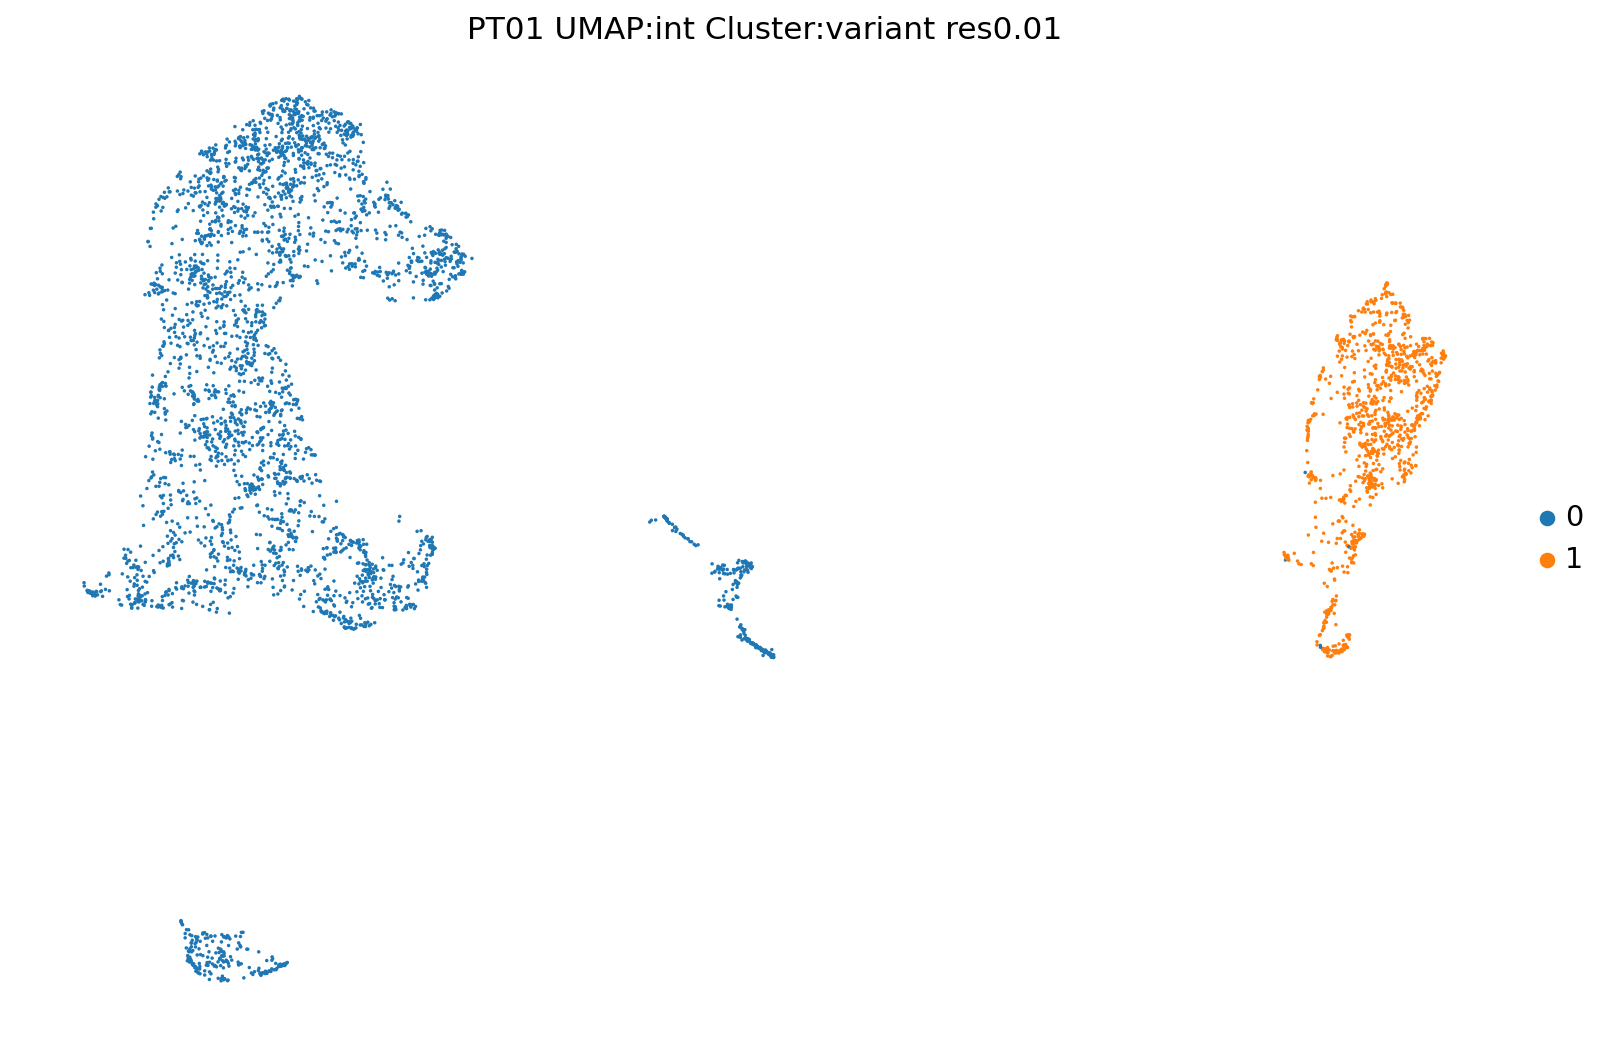

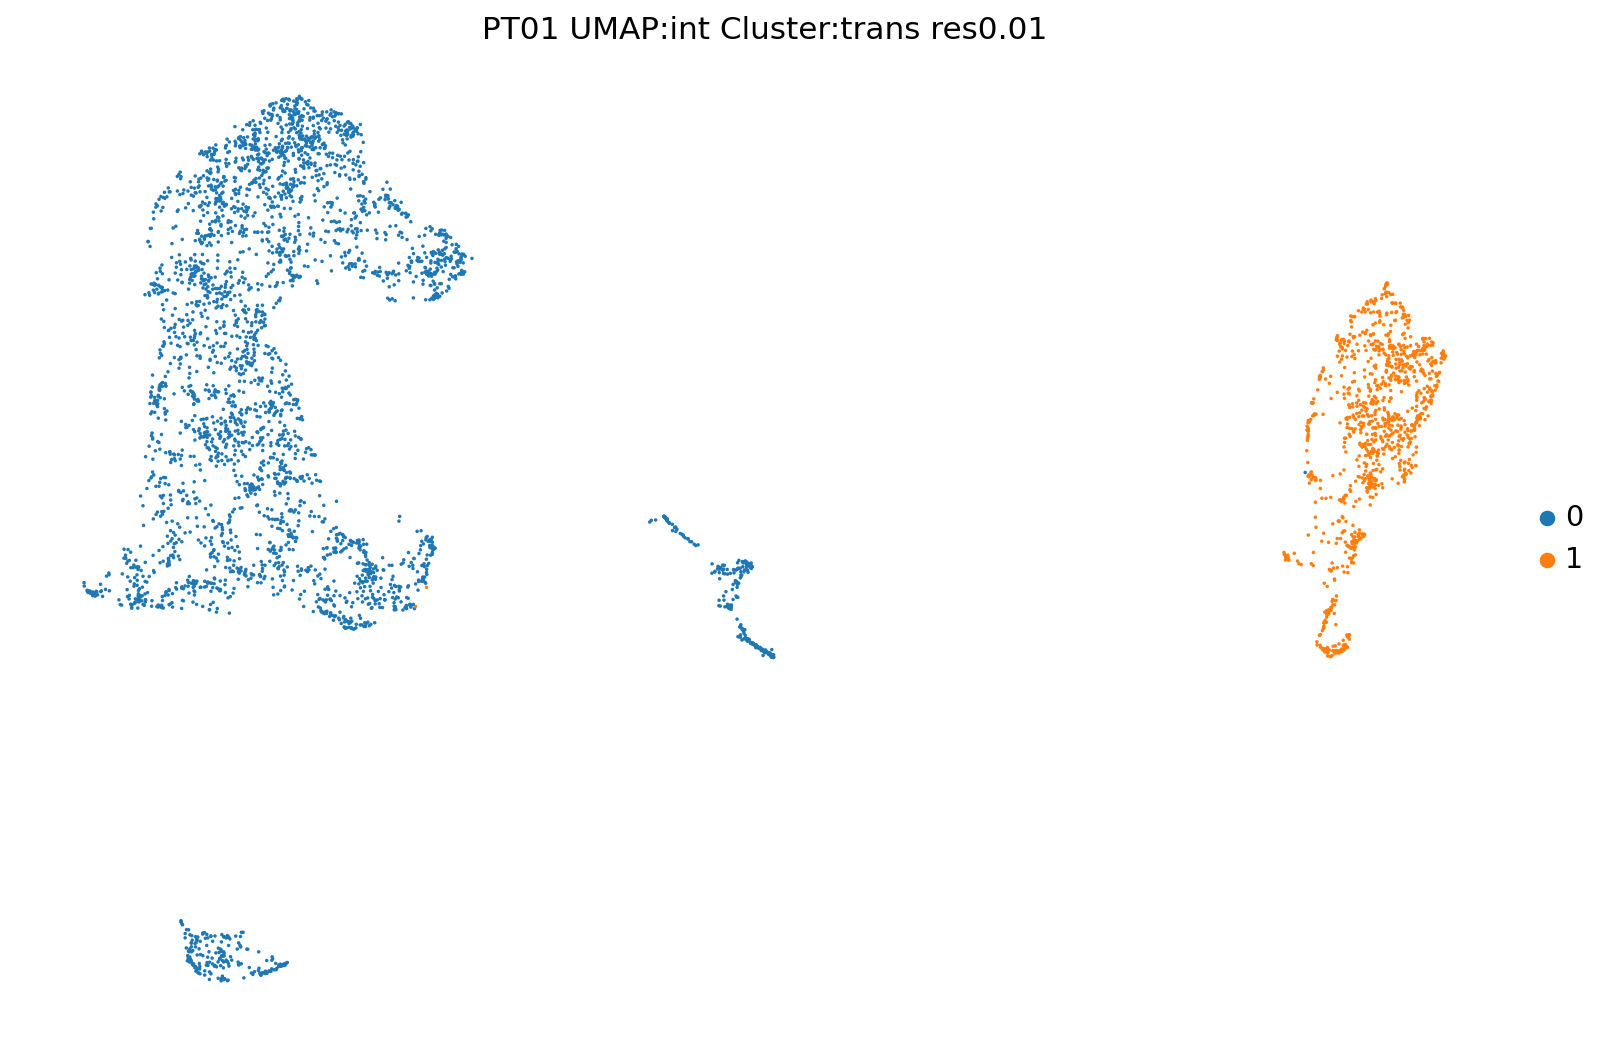

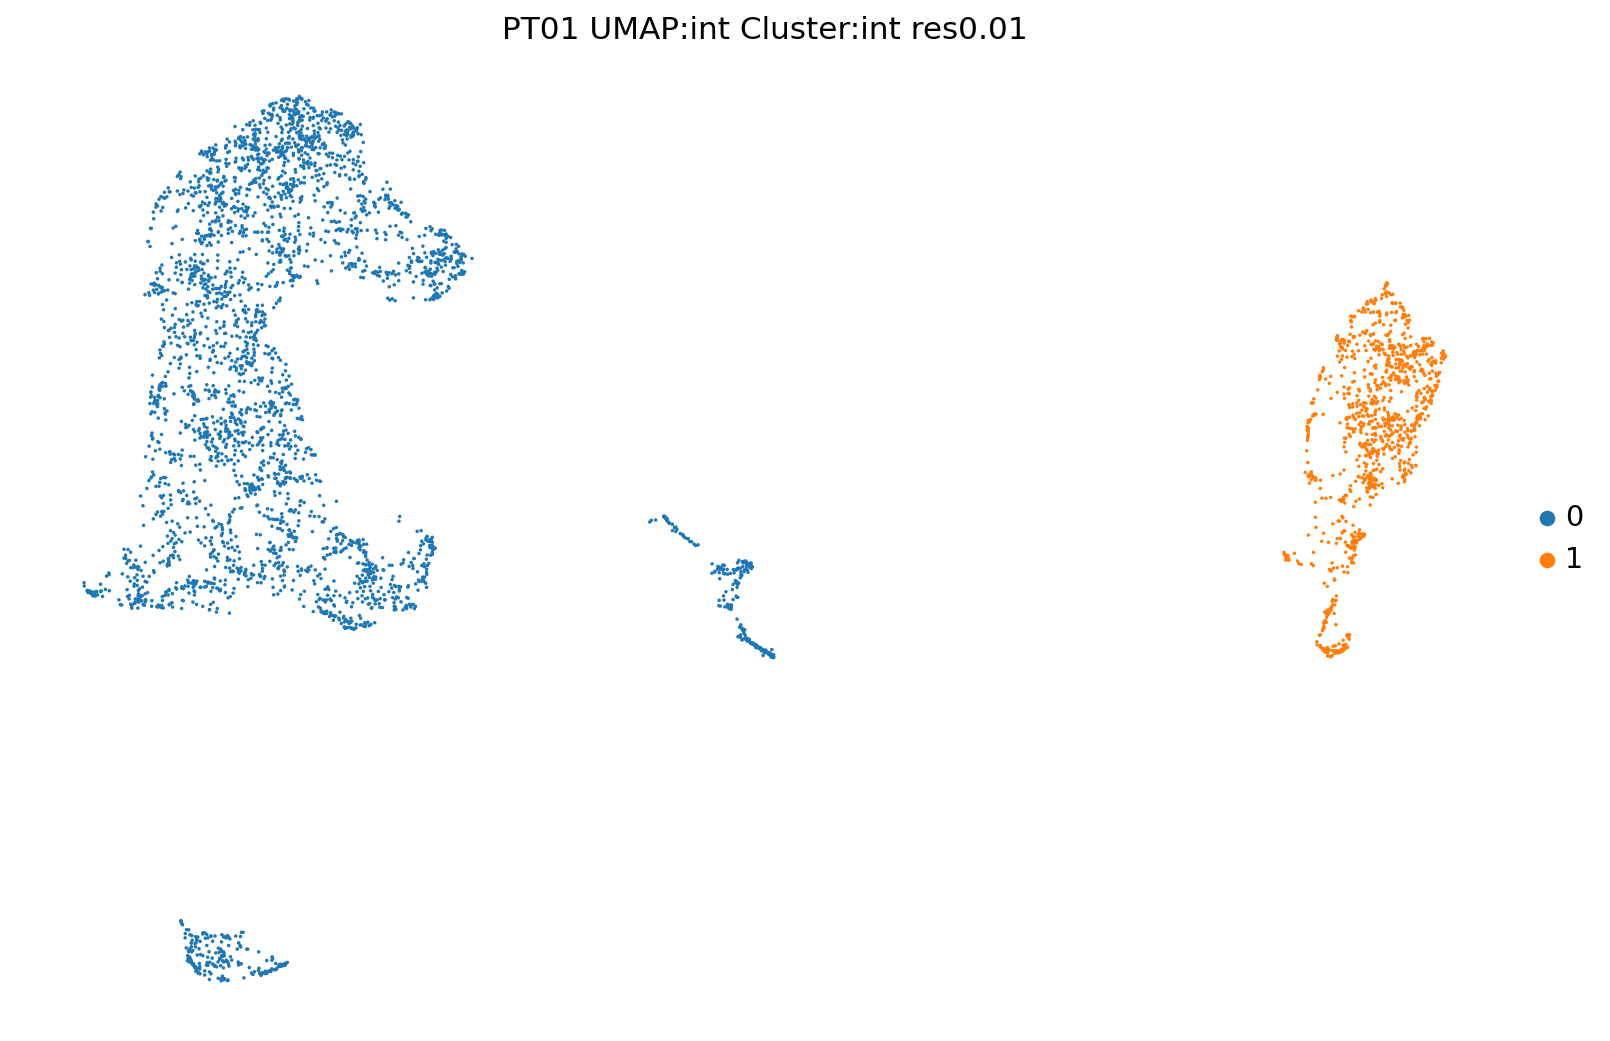

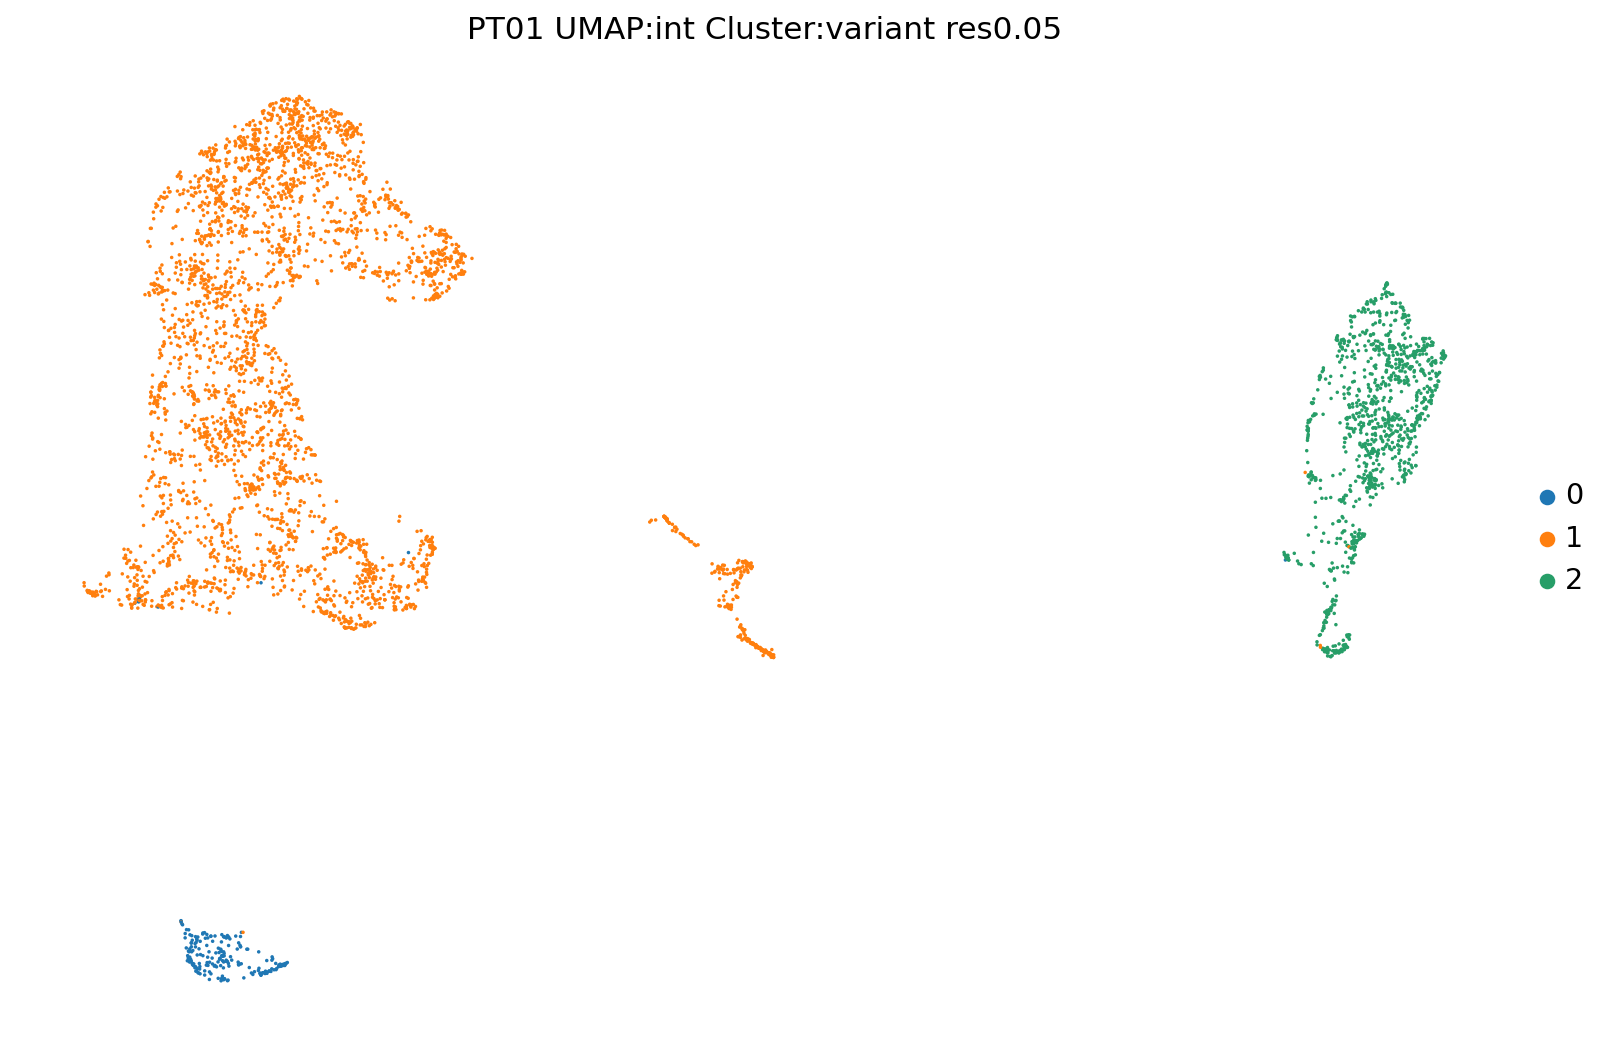

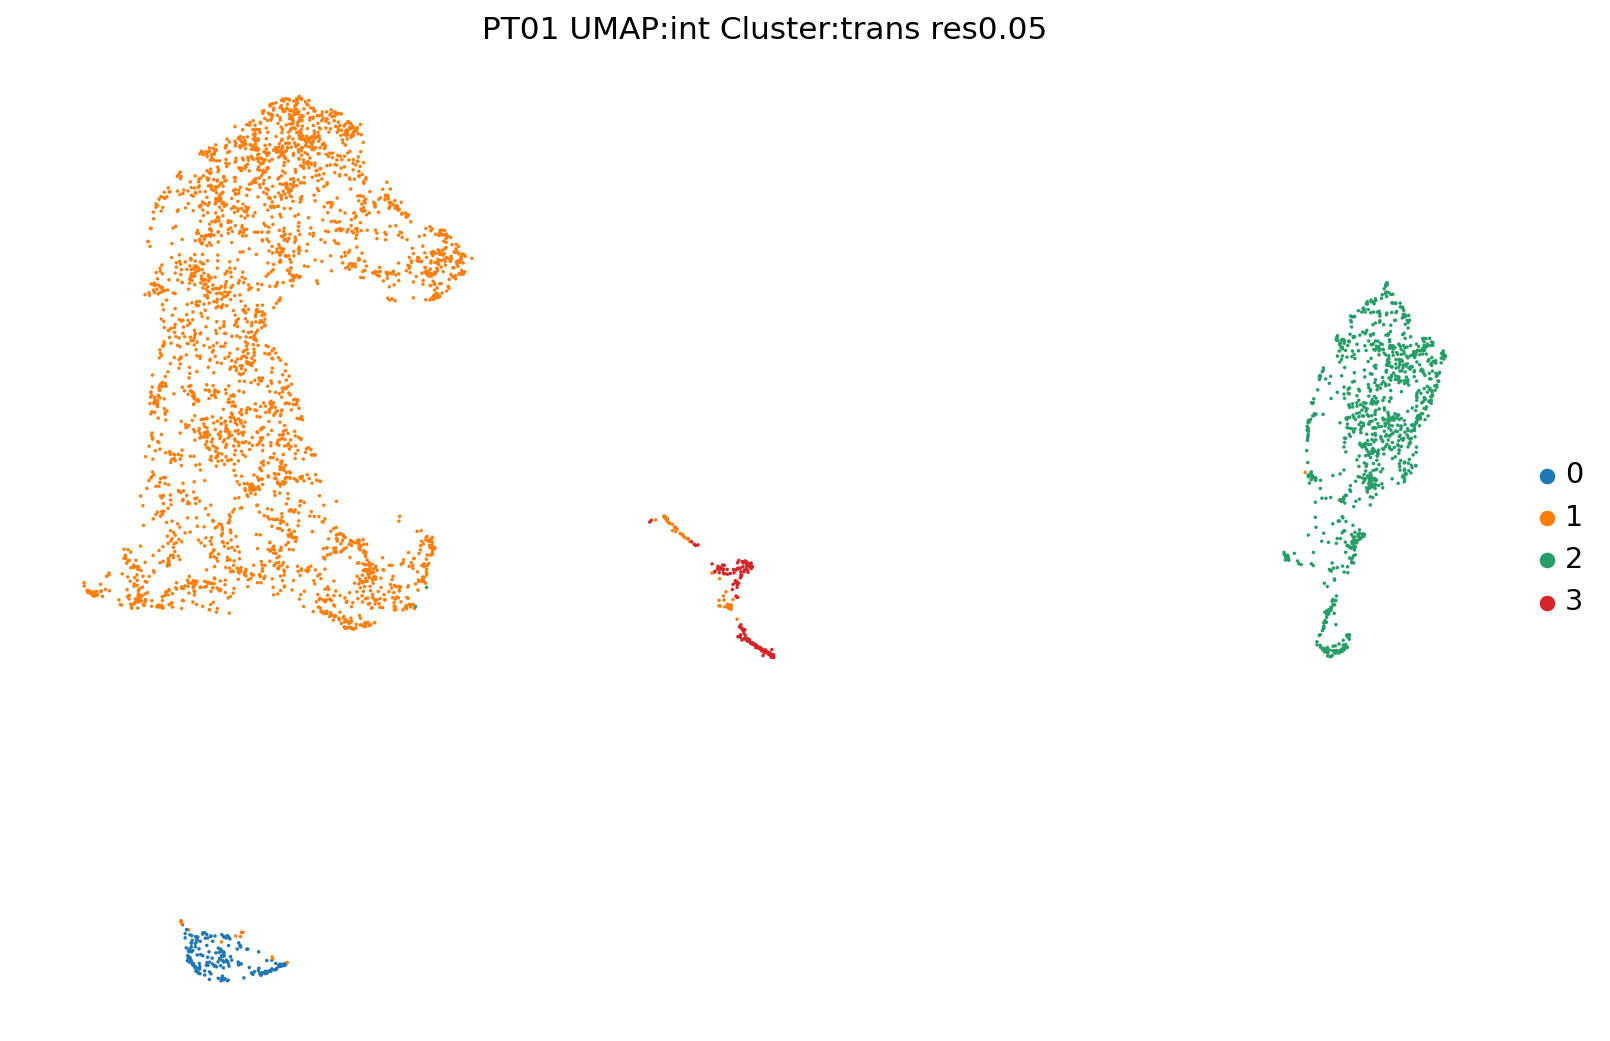

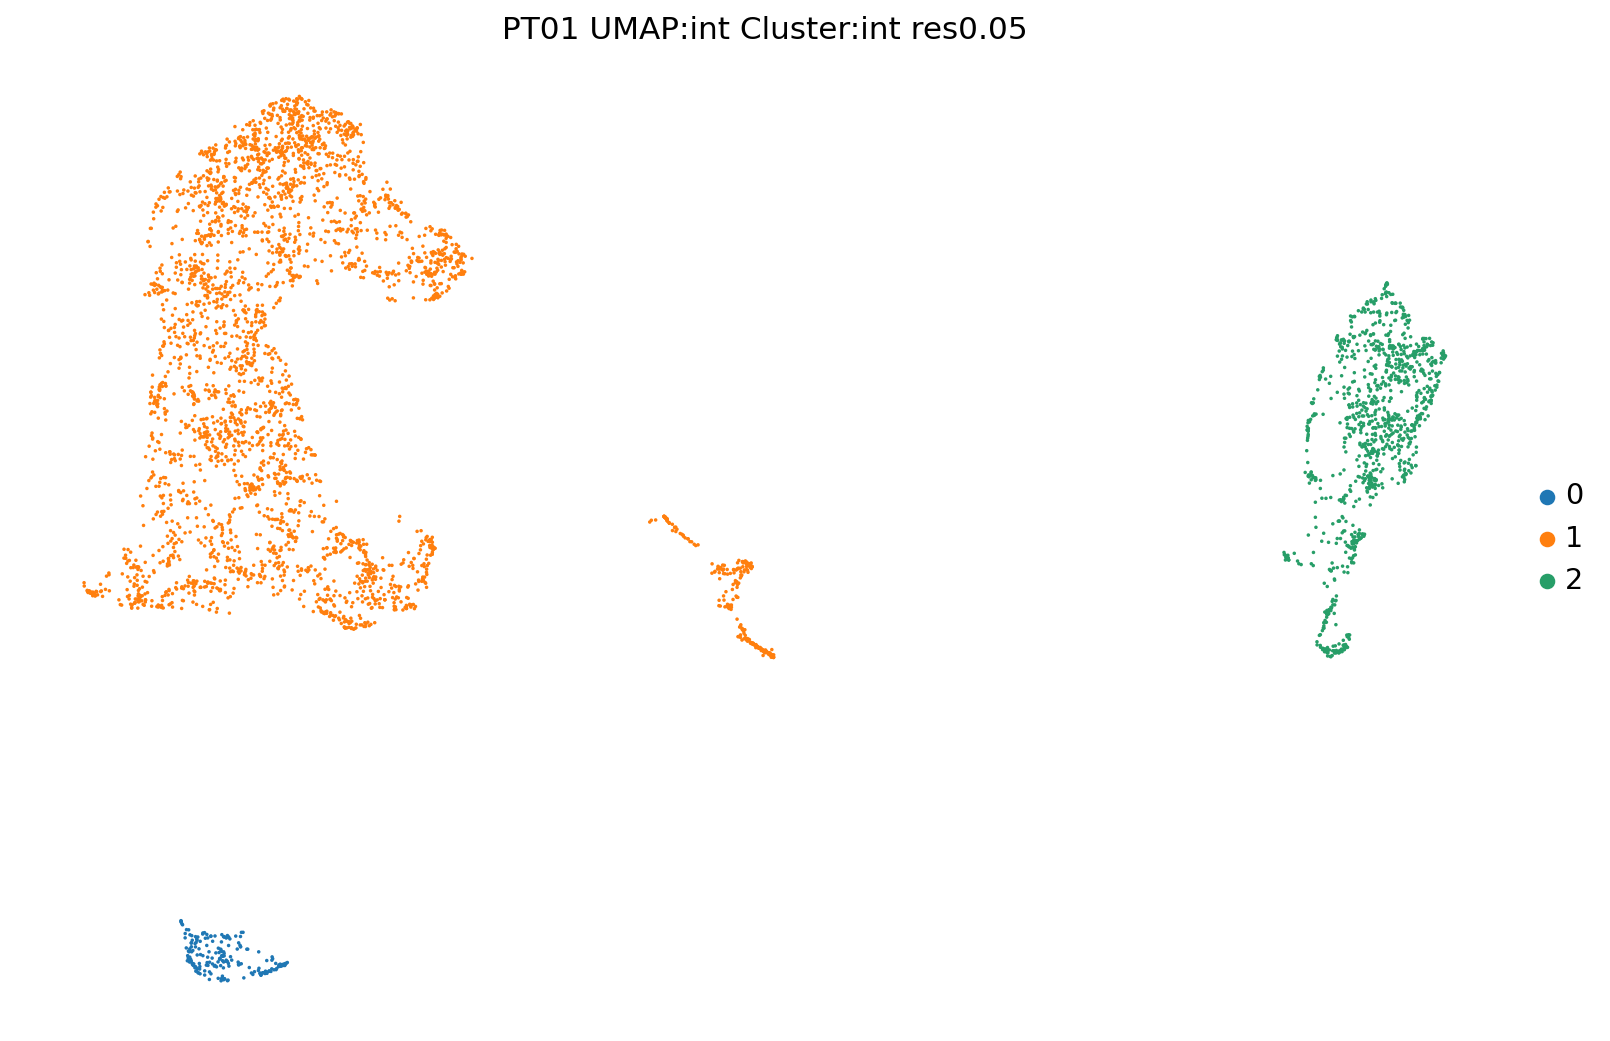

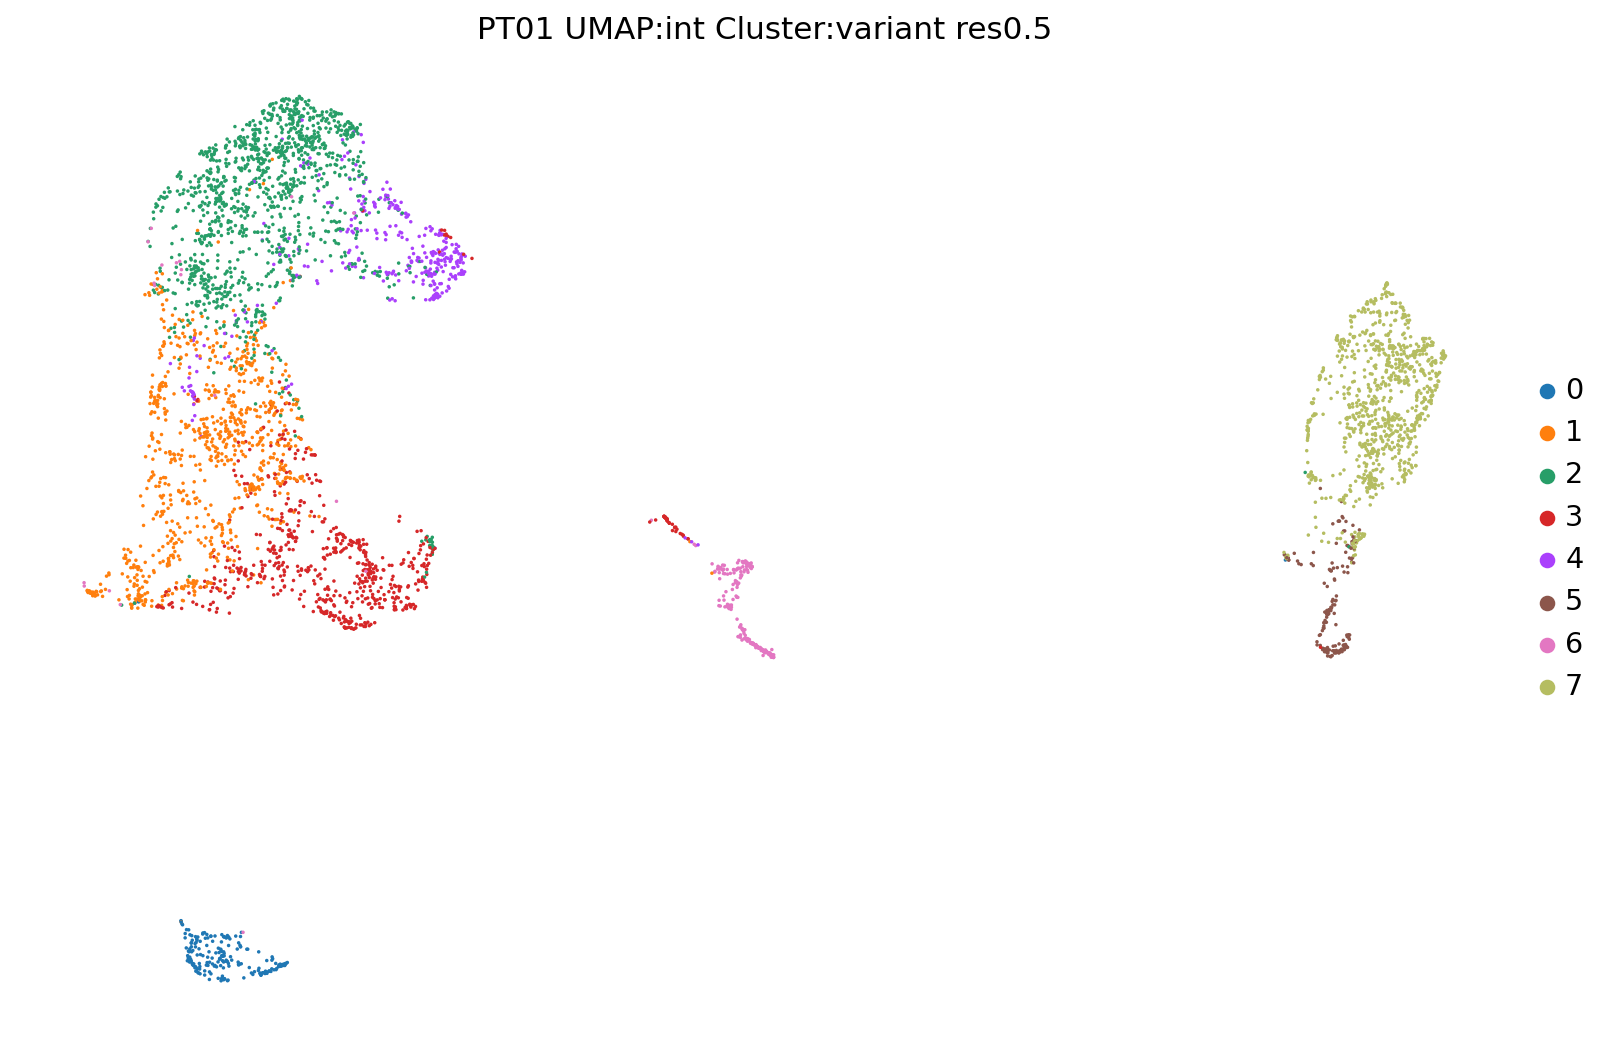

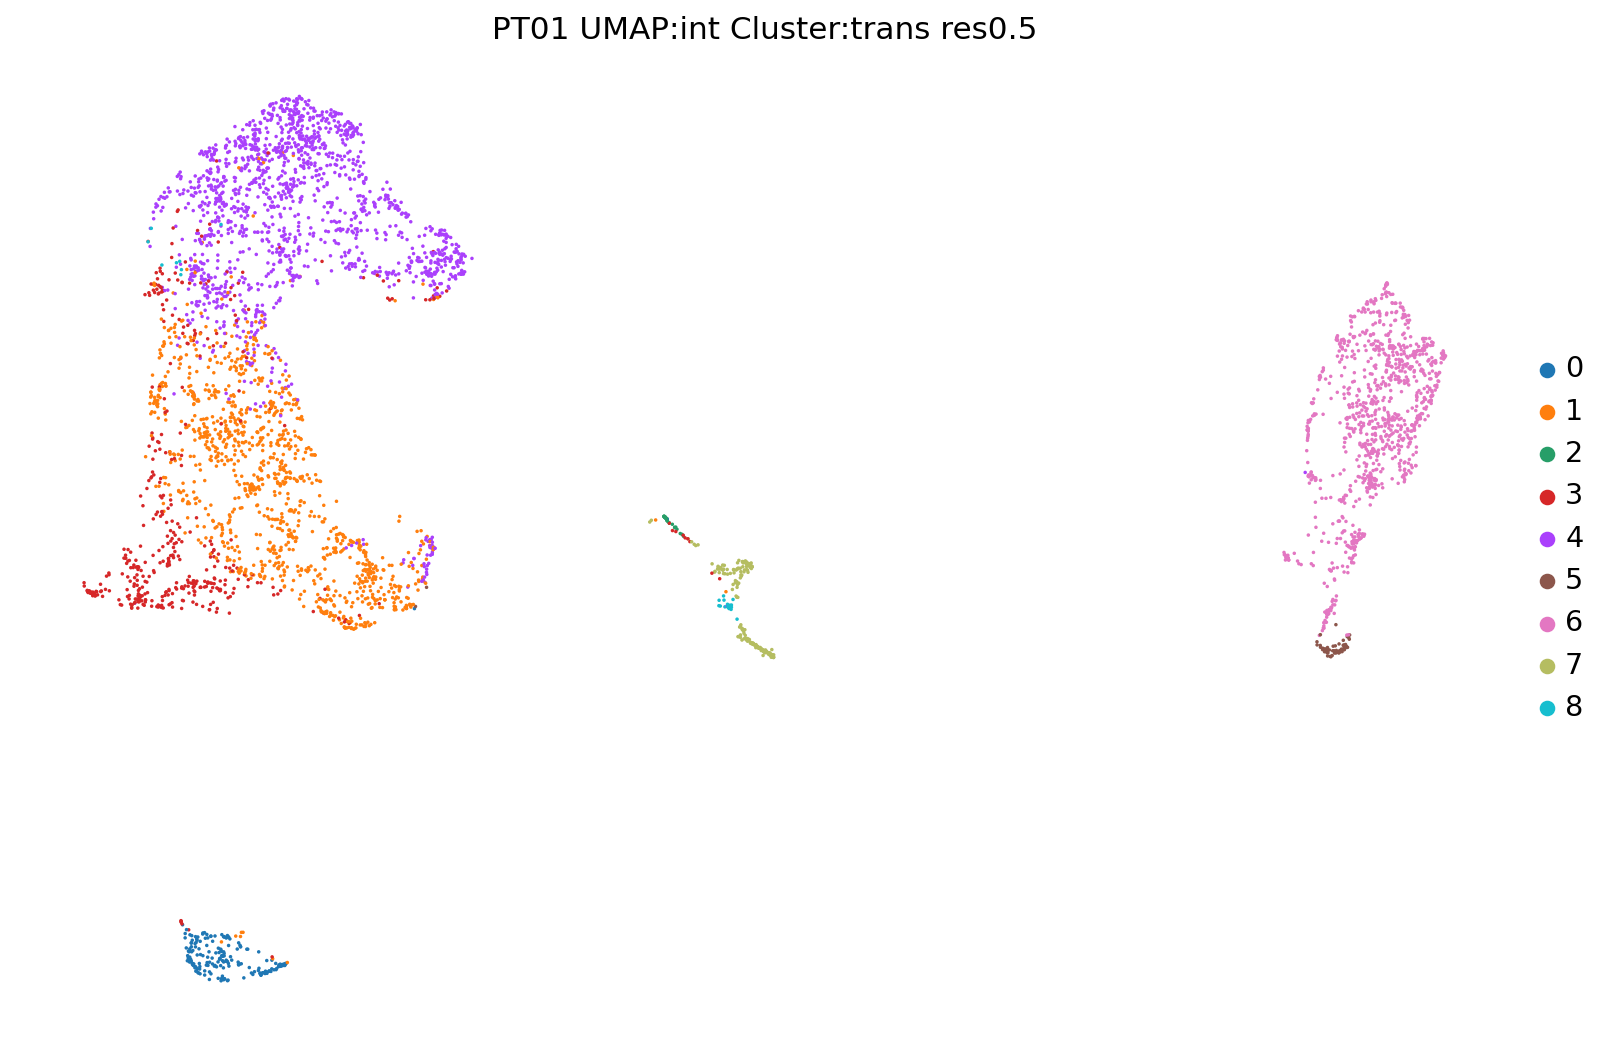

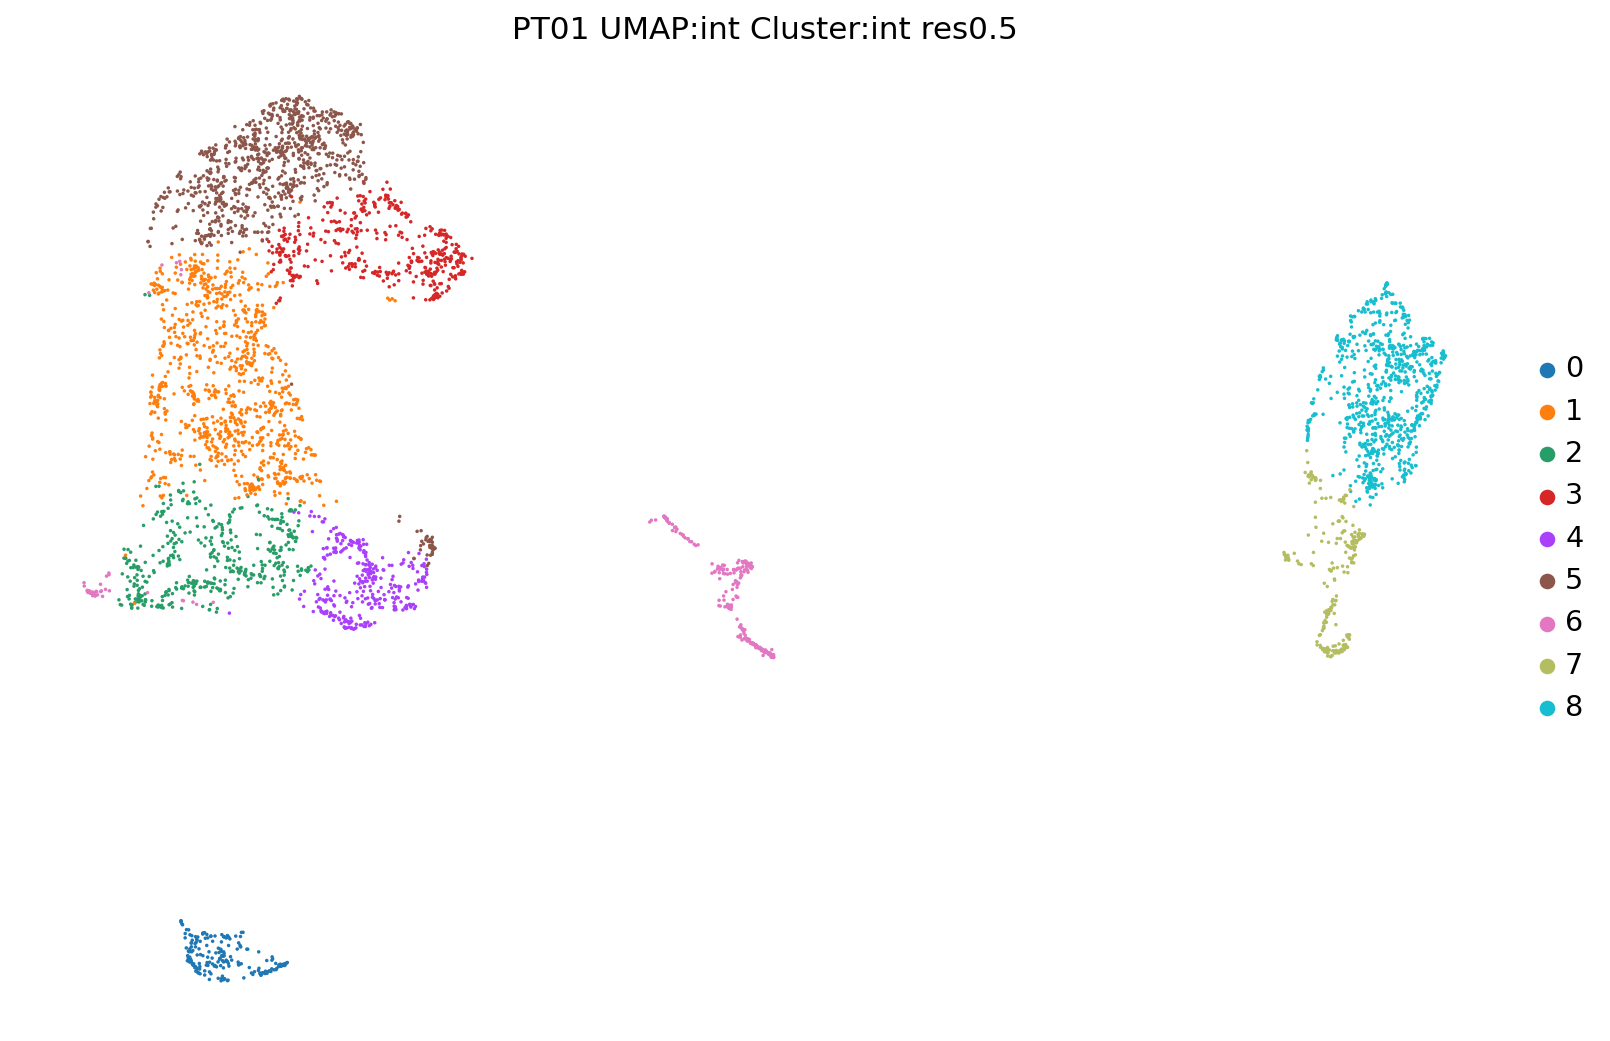

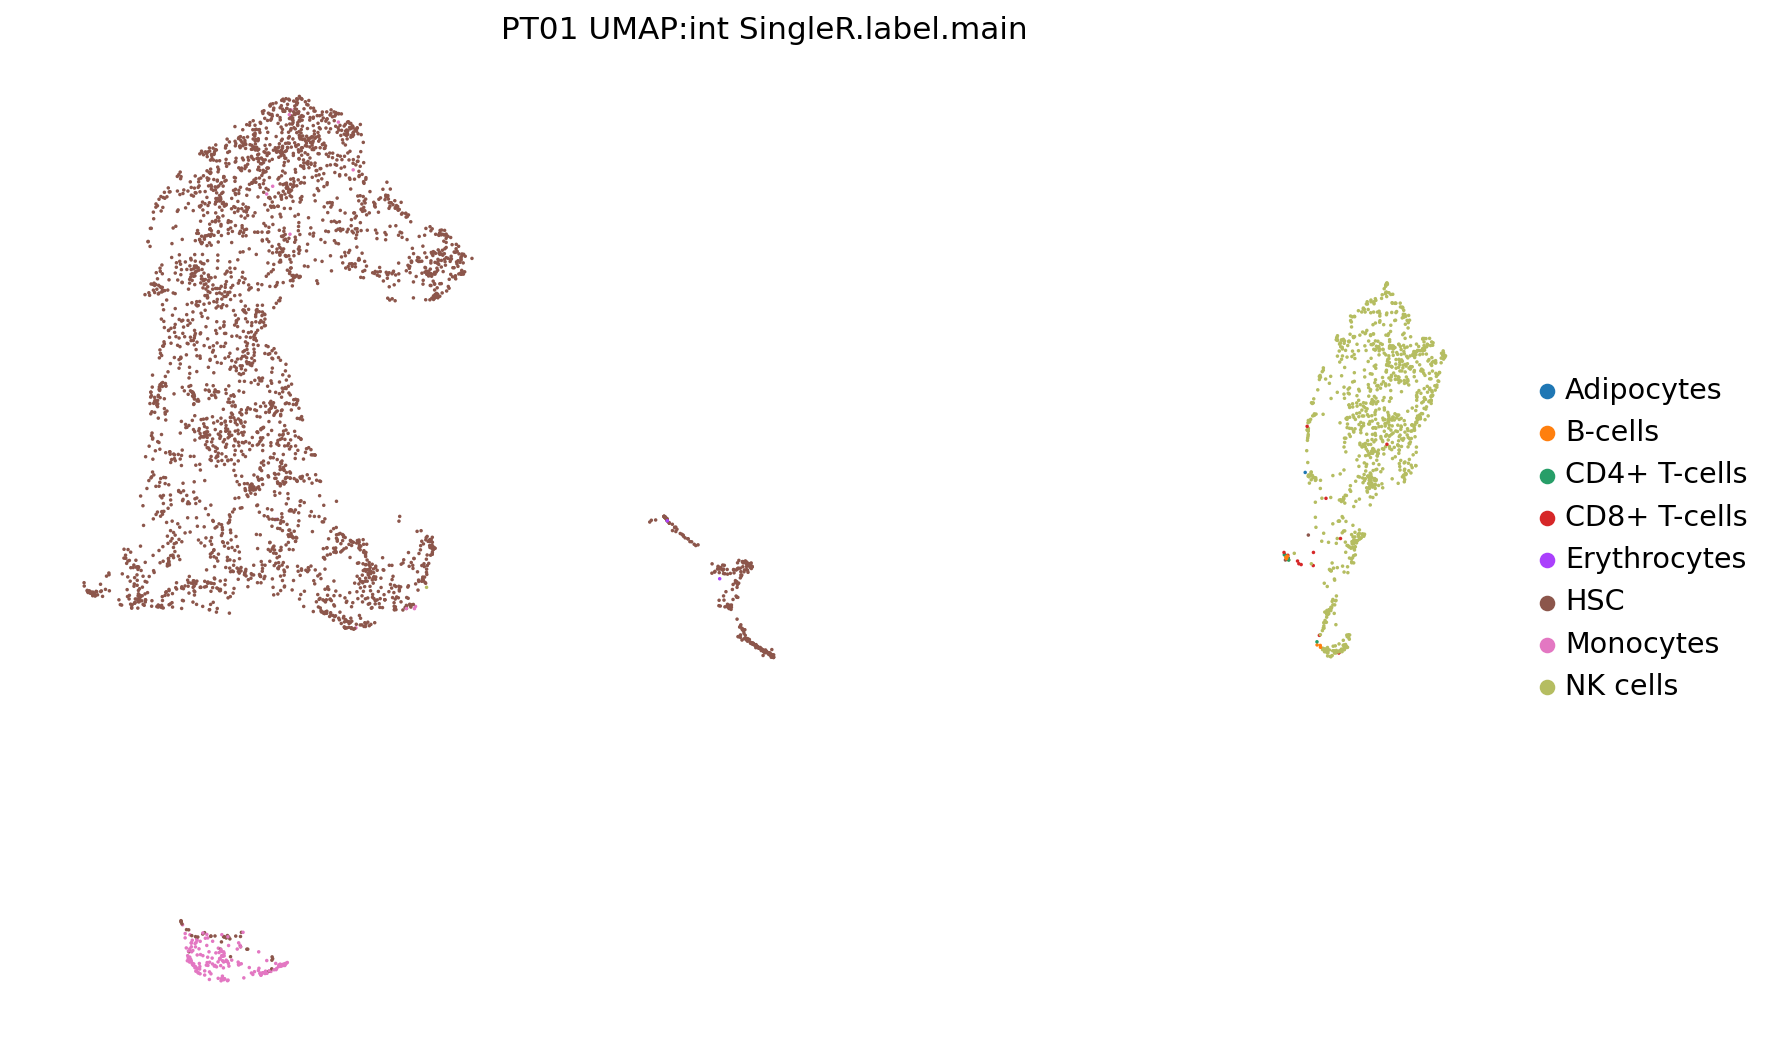

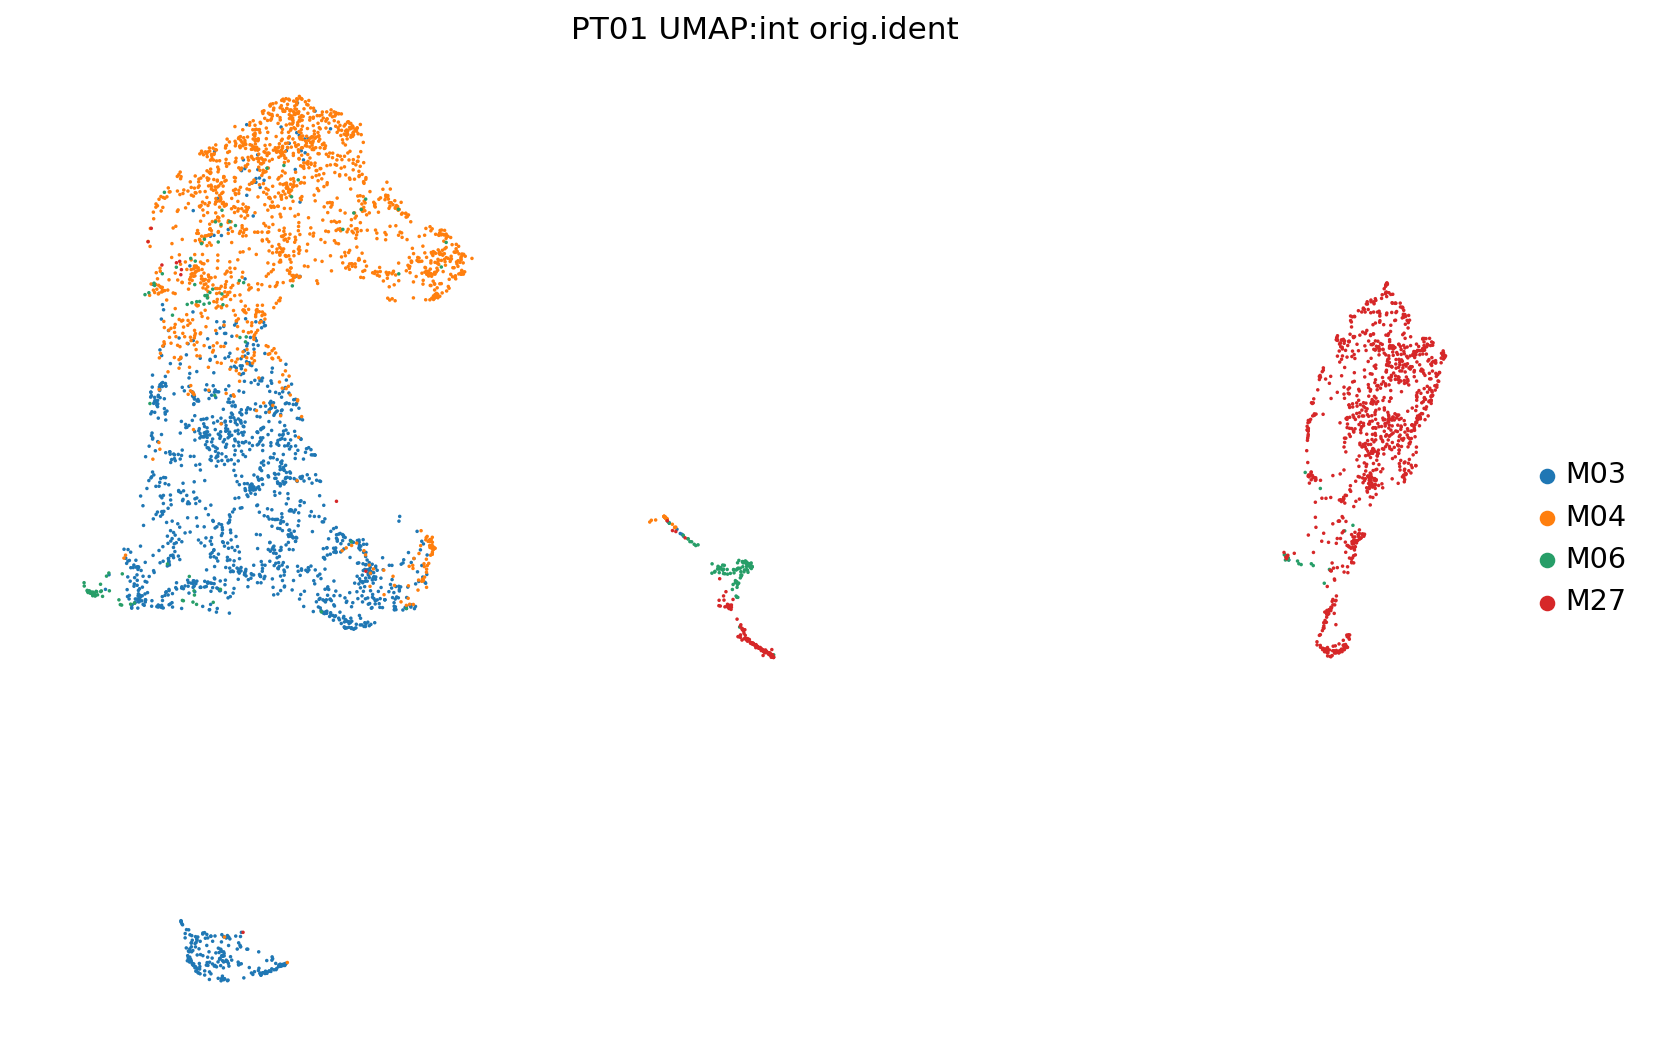

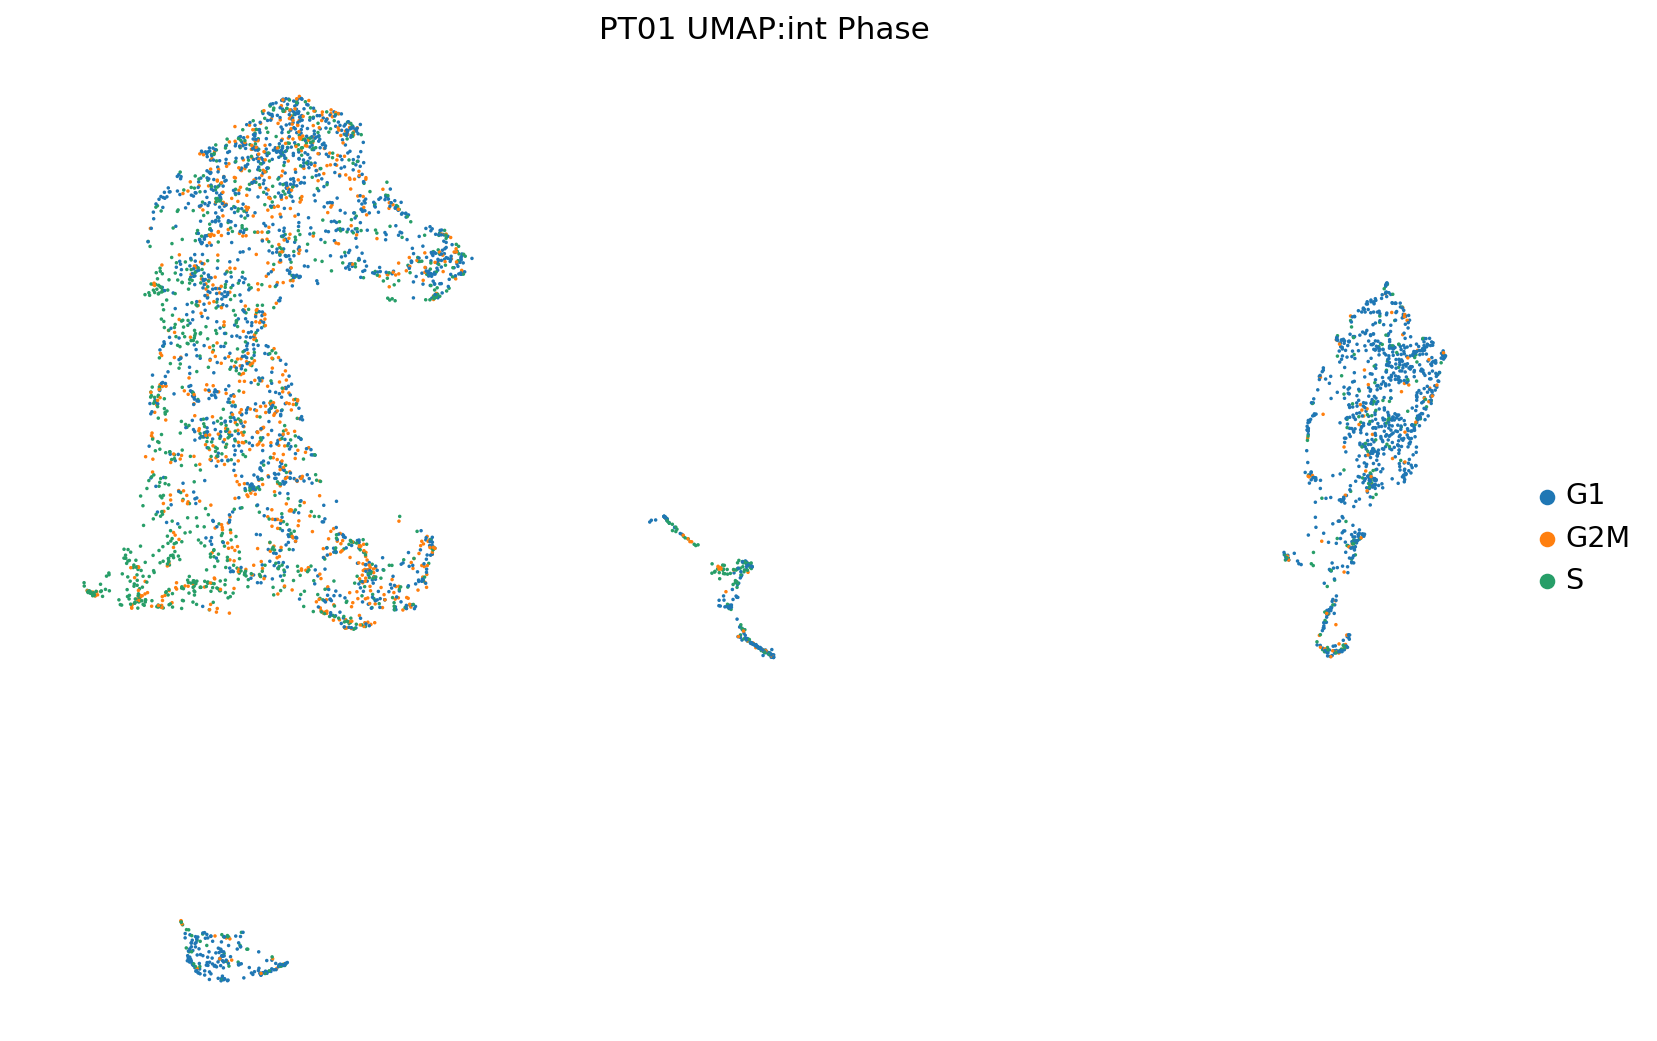

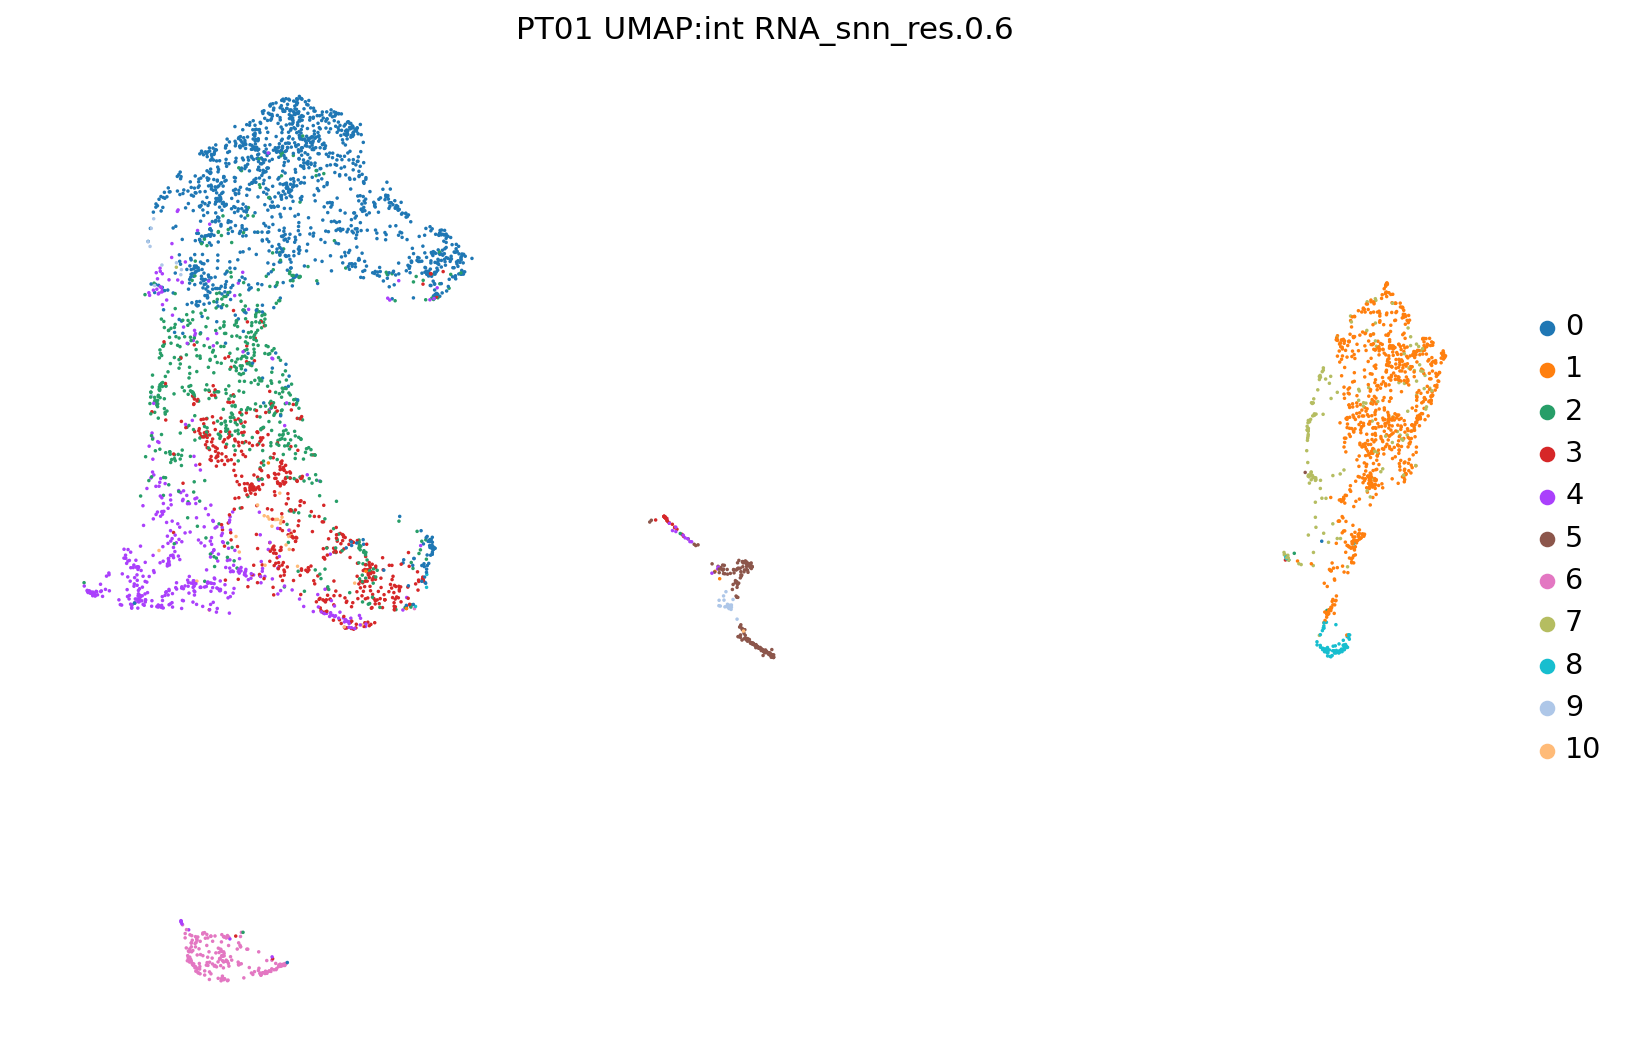

In [13]:
# Optionally add metadata from other scRNA-seq analysis tools (i.e., Seurat)
md = pd.read_csv(in_path + '/metadata.csv', header=0, index_col=0)
md = md.loc[list(adata.obs.index)]
for metadata in ['SingleR.label.main', 'orig.ident', 'Phase', 'RNA_snn_res.0.6']:
    adata.obs[metadata] = md[metadata]
adata.obs['RNA_snn_res.0.6'] = adata.obs['RNA_snn_res.0.6'].astype(str)

# Save all data 
with open(out_path + '_adata.pkl', 'wb') as f:
    pickle.dump(adata, f)

#####Perform preliminary plotting#####

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, frameon=True, vector_friendly=True, fontsize=14, figsize=(12,8), color_map=None, format='png', facecolor='#FFFFFF', transparent=False, ipython_format='png2x')

# Plotting
for res in [0.01, 0.05, 0.5]:
    for omic in ['variant', 'trans', 'int']:
        p = sc.pl.embedding(adata, basis='int_umap', color=omic + '_clust_' + str(res), title=[sample + ' UMAP:' + 'int' + ' Cluster:' + omic + ' res' + str(res)], size=10, frameon=False, return_fig=True)
        p.savefig(out_path + sample + '_INT_umap_' + omic + '_cluster_res' + str(res) + '.png')

for mtdt in ['SingleR.label.main', 'orig.ident', 'Phase', 'RNA_snn_res.0.6']:
    p = sc.pl.embedding(adata, basis='int_umap', color=mtdt, title=[sample + ' UMAP:' + 'int ' + mtdt], size=10, frameon=False, return_fig=True)
    p.savefig(out_path + sample + '_INT_umap_' + mtdt + '.png')


In [11]:
md

orig.ident  nCount_RNA  nFeature_RNA  percent.mt   S.Score  \
AAACCTGCACCACGTG-1        M03        4171          1456    6.137617  0.011243   
AAACCTGGTGAAATCA-1        M03        5319          1692    4.192517 -0.012919   
AAACGGGAGAAGCCCA-1        M03        7121          1666    8.959416  0.211490   
AAACGGGAGCCACTAT-1        M03        3616          1179   11.587389  0.023390   
AAACGGGCAAACTGTC-1        M03        8331          2277    4.993398 -0.003360   
...                       ...         ...           ...         ...       ...   
TTTGGTTGTACCGGCT-1        M27        1622           674    2.589396 -0.053269   
TTTGGTTGTTCAGGCC-1        M27        1776           726    2.927928 -0.017381   
TTTGTCAAGTCCCACG-1        M27        2703           969    3.477617 -0.085584   
TTTGTCACAGGTCCAC-1        M27        3431          1248    2.069368 -0.058334   
TTTGTCATCACCCGAG-1        M27        3526          1193    2.722632 -0.016552   

                    G2M.Score Phase  old.ident  CC.Difference  \
AAACCTGCACCACGTG-1  -0.026299     S          3       0.037542   
AAACCTGGTGAAATCA-1  -0.019340    G1          5       0.006421   
AAACGGGAGAAGCCCA-1   0.089528     S          1       0.121962   
AAACGGGAGCCACTAT-1   0.015363     S          0       0.008027   
AAACGGGCAAACTGTC-1   0.037813   G2M          5      -0.041172   
...                       ...   ...        ...            ...   
TTTGGTTGTACCGGCT-1  -0.086637    G1          1       0.033368   
TTTGGTTGTTCAGGCC-1   0.067577   G2M          6      -0.084958   
TTTGTCAAGTCCCACG-1  -0.036845    G1          2      -0.048739   
TTTGTCACAGGTCCAC-1   0.007221   G2M          9      -0.065555   
TTTGTCATCACCCGAG-1  -0.079304    G1          5       0.062752   

                    RNA_snn_res.0.4  seurat_clusters  RNA_snn_res.0.6  \
AAACCTGCACCACGTG-1                5                7                6   
AAACCTGGTGAAATCA-1                1                3                2   
AAACGGGAGAAGCCCA-1                3                6                4   
AAACGGGAGCCACTAT-1                1                3                2   
AAACGGGCAAACTGTC-1                1                3                2   
...                             ...              ...              ...   
TTTGGTTGTACCGGCT-1                2                1                1   
TTTGGTTGTTCAGGCC-1                4               10                5   
TTTGTCAAGTCCCACG-1                2                1                1   
TTTGTCACAGGTCCAC-1                2                1                1   
TTTGTCATCACCCGAG-1                6                9                7   

                    RNA_snn_res.0.8  RNA_snn_res.1  RNA_snn_res.1.2  \
AAACCTGCACCACGTG-1                6              7                7   
AAACCTGGTGAAATCA-1                4              4                3   
AAACGGGAGAAGCCCA-1                5              6                6   
AAACGGGAGCCACTAT-1                4              4                3   
AAACGGGCAAACTGTC-1                4              4                3   
...                             ...            ...              ...   
TTTGGTTGTACCGGCT-1                1              1                1   
TTTGGTTGTTCAGGCC-1                8              9               10   
TTTGTCAAGTCCCACG-1                1              1                1   
TTTGTCACAGGTCCAC-1                1              1                1   
TTTGTCATCACCCGAG-1                7              8                9   

                   SingleR.label.main  Leiden_mat_r1    CopyKAT  \
AAACCTGCACCACGTG-1          Monocytes              1    diploid   
AAACCTGGTGAAATCA-1                HSC              1    diploid   
AAACGGGAGAAGCCCA-1                HSC              1    diploid   
AAACGGGAGCCACTAT-1                HSC              1    diploid   
AAACGGGCAAACTGTC-1                HSC              1    diploid   
...                               ...            ...        ...   
TTTGGTTGTACCGGCT-1           NK cells              2  aneuploid   